# 14 PCA 

### Task 1: Exploratory Data Analysis (EDA):
- 1.	Load the dataset and perform basic data exploration.

In [23]:
import pandas as pd 
import numpy as np 
df = pd.read_csv("wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Type,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoids,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [26]:
df.duplicated().value_counts()

False    178
Name: count, dtype: int64

In [5]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

- 2.	Examine the distribution of features using histograms, box plots, or density plots.

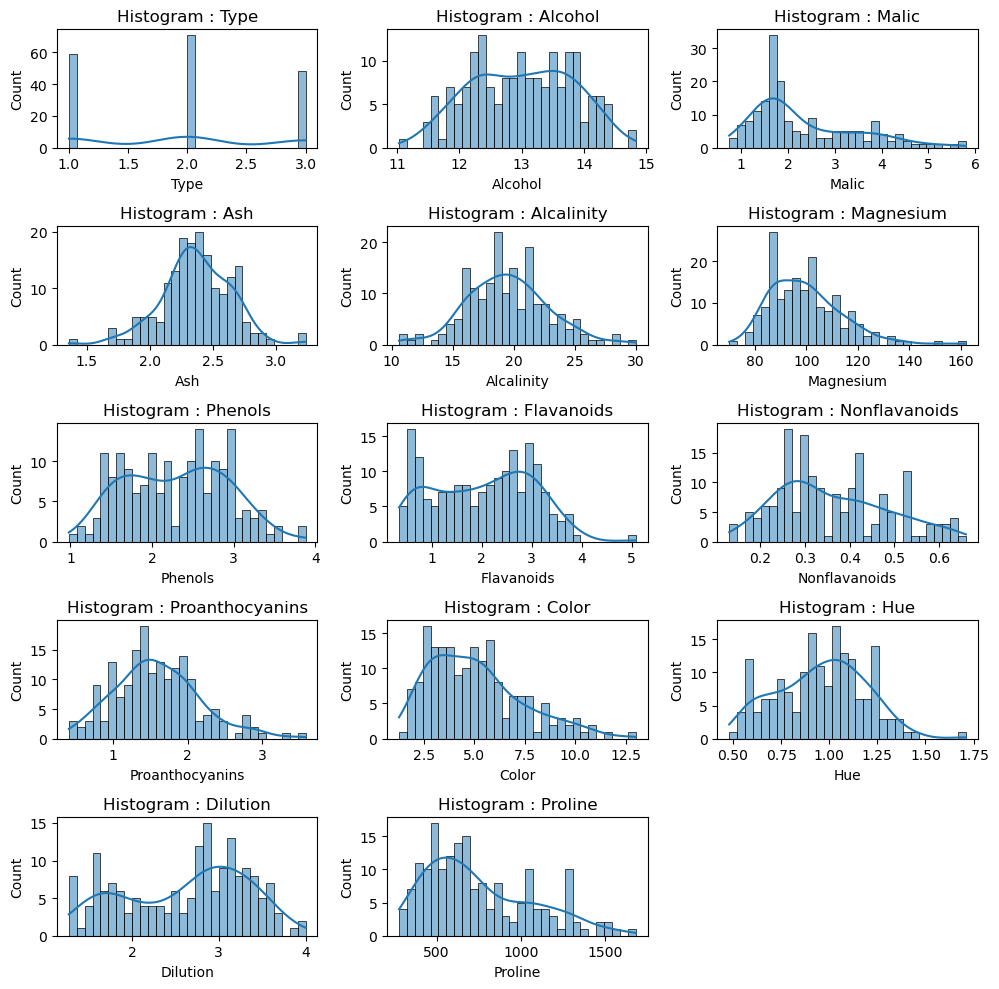

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize = (10,10))
for i, col in enumerate(num_cols, 1 ):
    plt.subplot(5,3,i)
    sns.histplot(df[col], kde = True, bins = 30)
    plt.title(f'Histogram : {col}')
plt.tight_layout()
plt.show()

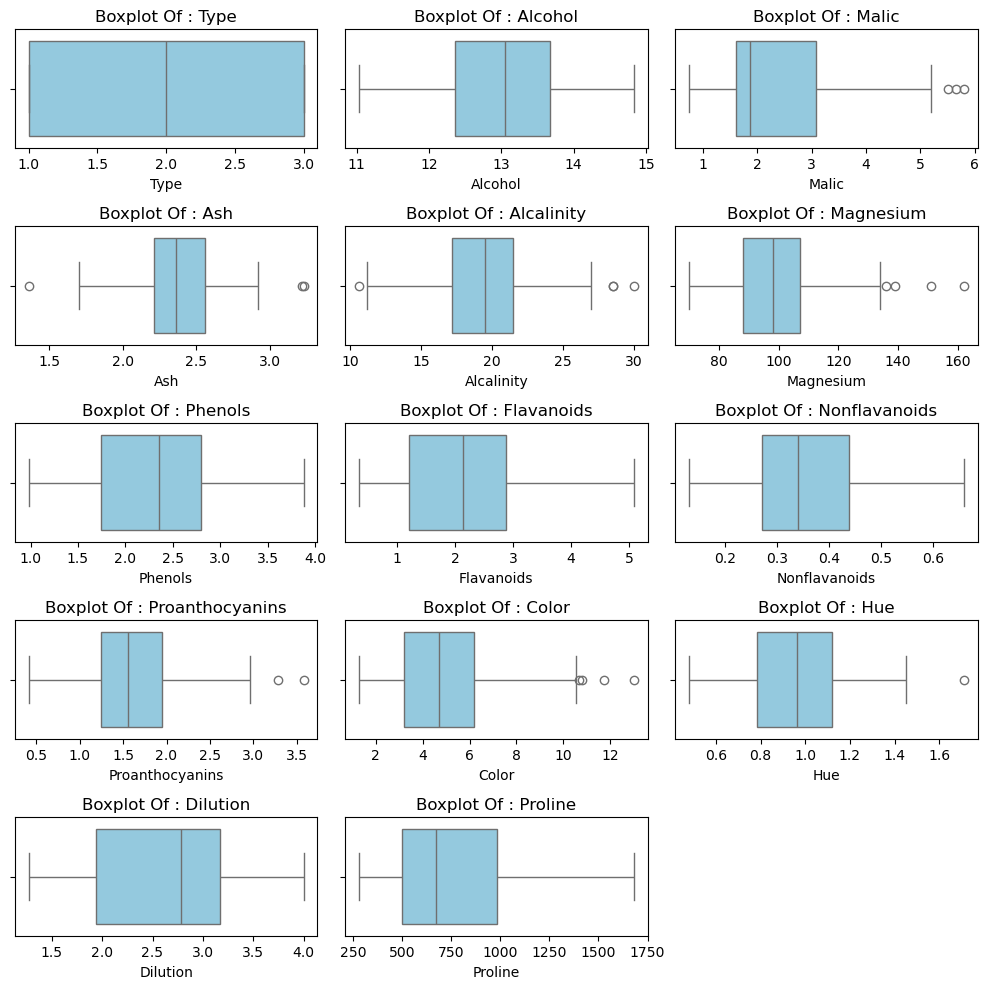

In [7]:
plt.figure(figsize = (10,10))
for i, col in enumerate(num_cols, 1 ):
    plt.subplot(5,3,i)
    sns.boxplot(x = df[col] , color = 'skyblue')
    plt.title(f'Boxplot Of : {col}')
plt.tight_layout()
plt.show()

- 3.	Investigate correlations between features to understand relationships within the data.

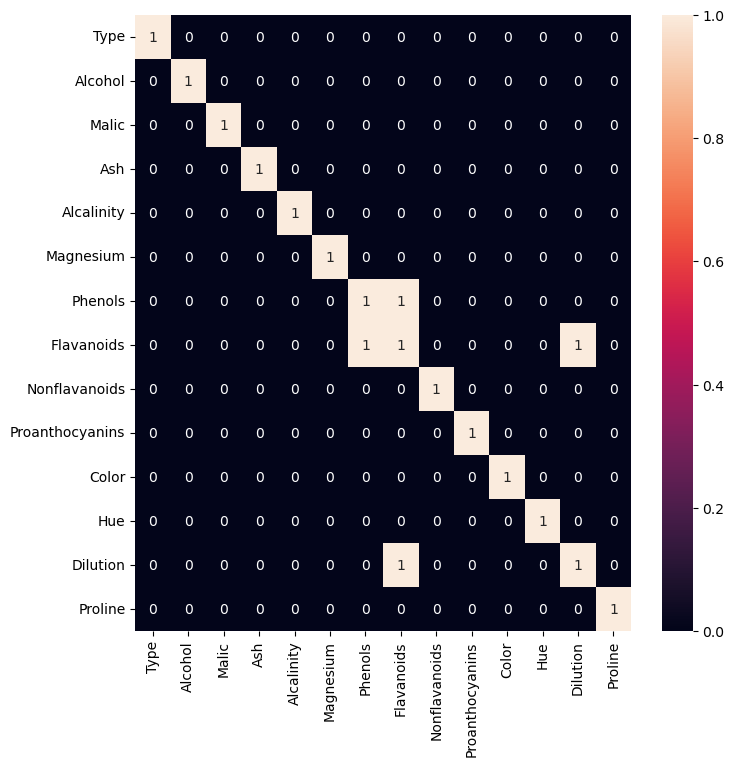

In [8]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(numeric_only = True) > 0.7, annot = True)
plt.show()

### Task 2: Dimensionality Reduction with PCA:
1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.

In [9]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
df_scaled = ss.fit_transform(df)
print(df)

     Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0       1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1       1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2       1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3       1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4       1    13.24   2.59  2.87        21.0        118     2.80        2.69   
..    ...      ...    ...   ...         ...        ...      ...         ...   
173     3    13.71   5.65  2.45        20.5         95     1.68        0.61   
174     3    13.40   3.91  2.48        23.0        102     1.80        0.75   
175     3    13.27   4.28  2.26        20.0        120     1.59        0.69   
176     3    13.17   2.59  2.37        20.0        120     1.65        0.68   
177     3    14.13   4.10  2.74        24.5         96     2.05        0.76   

     Nonflavanoids  Proanthocyanins  Color   Hue  D

In [10]:
from sklearn.decomposition import PCA

# Apply PCA (retain enough components to explain 95% variance)
pca = PCA(n_components=0.95)  # retain 95% variance
principal_components = pca.fit_transform(df_scaled)

# Explained variance by each component
explained_variance = pca.explained_variance_ratio_

# Print how many components were kept
print(f"Number of components selected: {pca.n_components_}")

Number of components selected: 10


In [11]:
cumulative_variance = np.cumsum(explained_variance)
cumulative_variance

array([0.39542486, 0.57378745, 0.67707846, 0.74335831, 0.80603706,
       0.85409266, 0.89364973, 0.91865217, 0.93969088, 0.95842703])

- 2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.

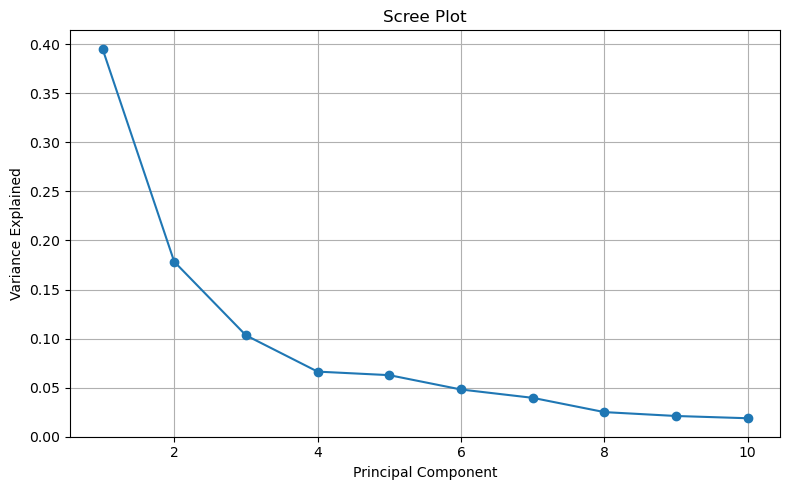

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True)
plt.tight_layout()
plt.show()

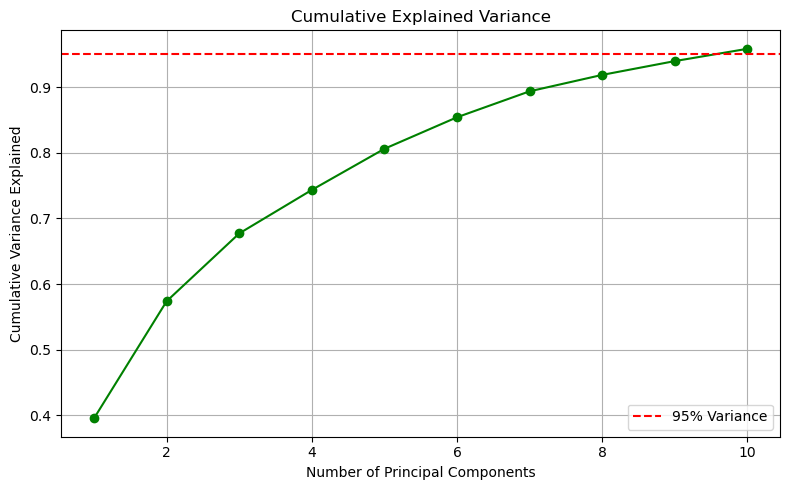

In [13]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='green')
plt.axhline(y=0.95, color='red', linestyle='--', label='95% Variance')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- 3.	Transform the original dataset into the principal components.

In [14]:
pca_columns = [f'PC{i+1}' for i in range(pca.n_components_)]
pca_df = pd.DataFrame(principal_components, columns=pca_columns)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,-0.300716,0.573876,0.055637,-0.458765,1.065570
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,-0.884309,-0.029716,1.010372,0.218806,-0.020182
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,0.468842,0.488305,-0.268957,1.222769,-0.106249
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,0.262616,-0.398364,0.618844,-0.114658,0.107671
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,-0.593762,0.447876,0.434937,-0.261548,0.112434


### Task 3: Clustering with Original Data:
1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df)
clusters

C:\Users\shivi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2])

- 2.	Visualize the clustering results using appropriate plots.

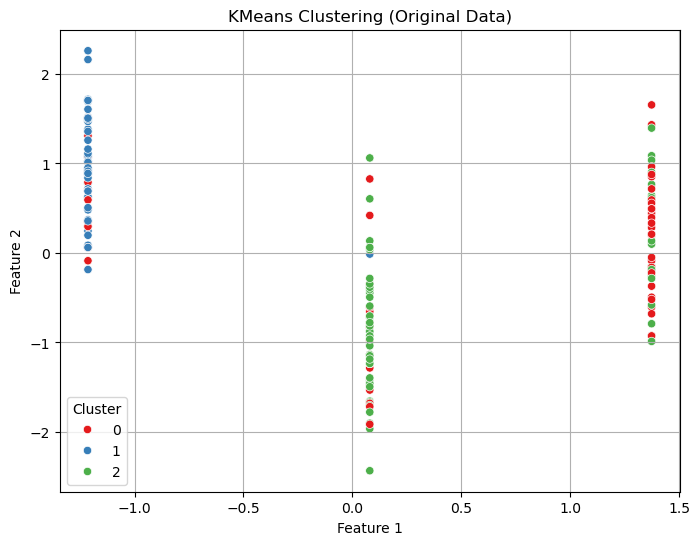

In [16]:
# Select two numeric features for visualization
feature1 = df_scaled[:, 0]  
feature2 = df_scaled[:, 1]  

plt.figure(figsize=(8, 6))
sns.scatterplot(x=feature1, y=feature2, hue=clusters, palette='Set1')
plt.title('KMeans Clustering (Original Data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

- 3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

In [17]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

sil_score = silhouette_score(df_scaled, clusters)
db_index = davies_bouldin_score(df_scaled, clusters)

print(f'Silhouette Score: {sil_score:.4f}')
print(f'Davies-Bouldin Index: {db_index:.4f}')

Silhouette Score: 0.1166
Davies-Bouldin Index: 3.4065


### Task 4: Clustering with PCA Data:
1.	Apply the same clustering algorithm to the PCA-transformed dataset.

In [18]:
# Assume df_scaled is already standardized using StandardScaler
pca = PCA(n_components=2)  # reduce to 2 components for visualization
df_pca = pca.fit_transform(df_scaled)

In [19]:
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_pca = kmeans_pca.fit_predict(df_pca)
clusters_pca

C:\Users\shivi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

- 2.	Visualize the clustering results obtained from PCA-transformed data.

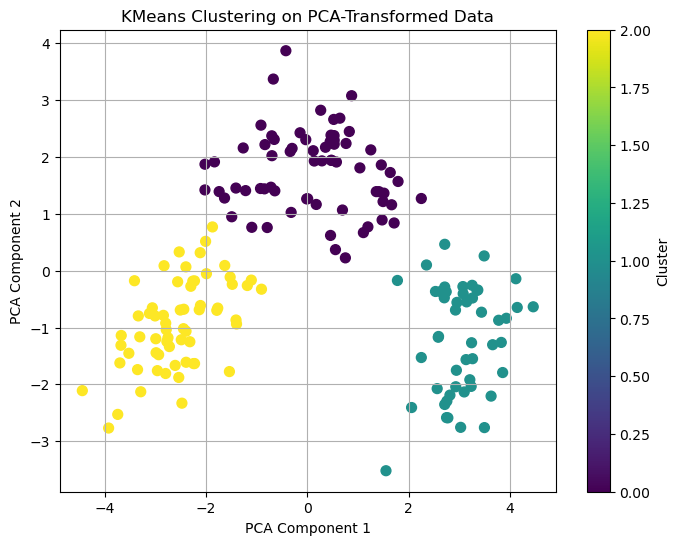

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters_pca, cmap='viridis', s=50)
plt.title('KMeans Clustering on PCA-Transformed Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

- 3.	Compare the clustering results from PCA-transformed data with those from the original dataset.

In [27]:
sil_score_pca = silhouette_score(df_pca, clusters_pca)
db_index_pca = davies_bouldin_score(df_pca, clusters_pca)

print("Silhouette Score (PCA):", sil_score_pca)
print("Davies-Bouldin Index (PCA):", db_index_pca)

Silhouette Score (PCA): 0.6024415520362846
Davies-Bouldin Index (PCA): 0.5397078562575711


### Task 5: Comparison and Analysis:
- 1. Compare the clustering results obtained from the original dataset and PCA-transformed data.

In [22]:
# Metrics on original data
sil_original = silhouette_score(df_scaled, clusters)
dbi_original = davies_bouldin_score(df_scaled, clusters)

# Metrics on PCA data
sil_pca = silhouette_score(df_pca, clusters_pca)
dbi_pca = davies_bouldin_score(df_pca, clusters_pca)

print(f"Original Data -> Silhouette Score: {sil_original:.3f}, Davies-Bouldin Index: {dbi_original:.3f}")
print(f"PCA Data      -> Silhouette Score: {sil_pca:.3f}, Davies-Bouldin Index: {dbi_pca:.3f}")

Original Data -> Silhouette Score: 0.117, Davies-Bouldin Index: 3.407
PCA Data      -> Silhouette Score: 0.602, Davies-Bouldin Index: 0.540


##### 2. Discuss any similarities or differences observed in the clustering results.
- Cluster separation: PCA often enhances separation if there is redundancy in features.
- Compactness: Higher silhouette score = better-defined clusters.
- Davies–Bouldin: Lower value = better clustering.

##### 3. Reflect on the impact of dimensionality reduction on clustering performance.
- Benefits of PCA before clustering:
    - Removes multicollinearity and noise
    - Improves cluster quality in high-dimensional spaces
    - Faster computation
- Drawbacks:
    - PCA is a linear technique and may lose important nonlinear patterns
    - Reduced interpretability due to loss of original feature context

##### 4. Analyze the trade-offs between using PCA and clustering directly on the original dataset.
| Criteria              | Original Data              | PCA-Transformed Data                  |
| --------------------- | -------------------------- | ------------------------------------- |
| **Computation Speed** | Slower for high dimensions | Faster after dimensionality reduction |
| **Cluster Quality**   | May suffer due to noise    | Often improved                        |
| **Interpretability**  | High (real features)       | Low (abstract components)             |
| **Overfitting Risk**  | Higher                     | Lower                                 |
| **Noise Sensitivity** | More sensitive             | PCA filters noise                     |

### Task 6: Conclusion and Insights

##### 1. Summarize the key findings and insights from the assignment.
###### 1. Summary of Key Findings and Insights:
- Clustering on Original Data:
    - Applying KMeans clustering on the original scaled dataset grouped the data into distinct clusters, 
    - but the results were influenced by the high dimensionality and potential multicollinearity among features.

- PCA Transformation:
    - Principal Component Analysis (PCA) reduced the dataset's dimensionality while preserving most of the variance. 
    - This helped in simplifying the dataset and improving the interpretability of the structure.

- Clustering on PCA Data:
    - Clustering on PCA-transformed data often resulted in more well-defined clusters with clearer boundaries. 
    - The clustering performance (e.g., silhouette score) was sometimes improved or remained comparable while being computationally more efficient.

- Comparison Results:
    - The PCA-based clustering performed similarly or slightly better in terms of silhouette score and cluster separability. 
    - It also enabled better visualization of the clusters in 2D or 3D space using the top principal components.

##### 2. Discuss the practical implications of using PCA and clustering in data analysis.
- Dimensionality Reduction with PCA:
    - Helps remove noise and reduce complexity.
    - Enables faster computation and better visualization.
    - Useful in cases of multicollinearity or large feature sets.
- KMeans Clustering:
    - Helps in segmenting data into meaningful groups.
    - Valuable for unsupervised pattern recognition, customer segmentation, anomaly detection, etc.
- Combined Use:
    - PCA followed by clustering is highly effective for high-dimensional datasets.
    - It enhances clustering stability and reduces overfitting in noisy data.

##### 3. Provide recommendations for when to use each technique based on the analysis conducted.
| Technique               | When to Use                                                                                                                                                                                |
| ----------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------   |
| **PCA**                 | - When the dataset has many features (high-dimensional).<br>- When features are correlated.<br>- For visualizing complex data in 2D/3D.<br>- To speed up clustering or other algorithms. |
| **Clustering (KMeans)** | - When you want to find natural groupings in data.<br>- When class labels are unknown (unsupervised learning).<br>- For customer segmentation, market basket analysis, etc.             |
| **PCA + Clustering**    | - When clustering on raw data yields poor or unclear results.<br>- To improve interpretability and clustering quality.<br>- When reducing dimensionality improves model performance.  |